# Name : siddhesh  dhande


# Roll no.71 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('iphone.csv')
data.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [4]:
data.shape

(400, 4)

In [5]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Salary', ylabel='Age'>

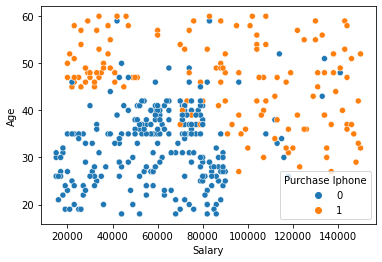

In [6]:
sns.scatterplot(x=data['Salary'],y=data['Age'],hue=data['Purchase Iphone'])

In [7]:
data = data.drop('Gender', axis=1)
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


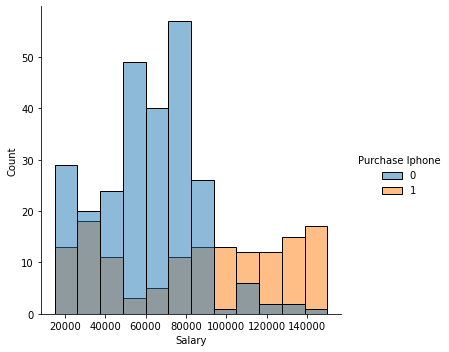

In [8]:
  sns.displot(data, x ='Salary', hue = 'Purchase Iphone')

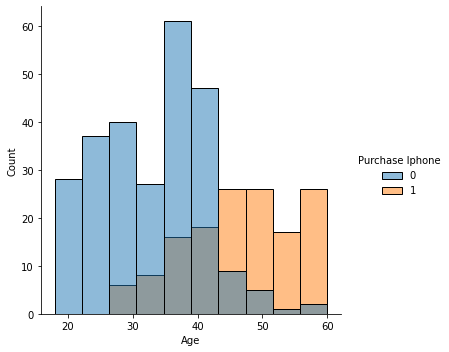

In [9]:
  sns.displot(data, x ='Age', hue = 'Purchase Iphone')

In [10]:
import numpy as np

def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum(pt1 - pt2) ** 2)
    return distance

a = np.array([3, 4])
b = np.array([5, 9])

print(euclidean_distance(a, b))

7.0


In [11]:
x =data.drop('Purchase Iphone', axis=1)
y =data['Purchase Iphone']

In [12]:
print(x)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [13]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state= 0)

In [15]:
print(X_train.shape)

(280, 2)


In [16]:
print(y_train.shape)

(280,)


In [17]:
print(X_test.shape)

(120, 2)


In [18]:
print(y_test.shape)

(120,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
unknow_values = KNeighborsClassifier(n_neighbors=7)

In [21]:
unknow_values.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [22]:
y_pred = unknow_values.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

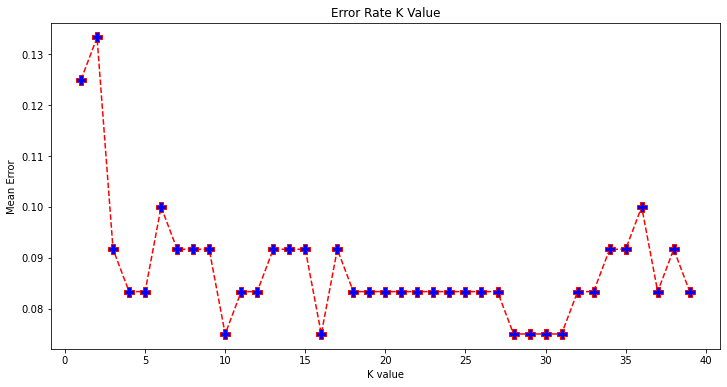

In [25]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1, 40):
    model= KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i !=y_test))
    
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color ='red', linestyle ='dashed', marker ='P', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')


In [26]:
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [27]:
Age = int(input("Enter New Person Age: "))
Salary = int(input("Enter New Person Salary: "))
newperson = [[Age, Salary]]
result = model.predict(sc.transform(newperson))
print(result)

if result == 1:
    print("Person might purchase Iphone")
else:
    print("Person might not purchase Iphone")

Enter New Person Age: 25
Enter New Person Salary: 900000
[1]
Person might purchase Iphone


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[72  7]
 [13 28]]
Accuracy of the Model: 83.33333333333334%
